In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
IMG_SIZE = 128
def get_cropped(img, final_size):
    '''
    Resize the image through its smallest dimension,
    then crop out the center and return as np array.
    final_size must be <= the min of image dimension
    '''
    size = img.size
    ratio = float(final_size) / min(size)
    new_image_size = tuple([int(x*ratio) for x in size])
    img = img.resize(new_image_size, Image.ANTIALIAS)
    width, height = img.size
    w_mid, h_mid = width // 2, height // 2
    img = np.array(img)
    img = img[(h_mid-final_size//2):(h_mid+final_size//2), (w_mid-final_size//2):(w_mid+final_size//2)]
    
    if img.shape == (final_size, final_size, 3):
        return img[:, :, 0]  # take only one channel of the image
    else:
        print('Error: Image size = {}'.format(size))

def load_images_from_dir(dirpath):
    images = []
    for filename in os.listdir(dirpath):
        try:
            img = Image.open(os.path.join(dirpath,filename))
            images.append(img)
        except:
            pass
    return images

def load_data(dirpath):
    imgs = load_images_from_dir(dirpath)
    imgs = [get_cropped(img, IMG_SIZE) for img in imgs]
    imgs = np.array([img for img in imgs if img is not None])
    return imgs

In [3]:
data = load_data('../gallaghar-cropped/9/')
data.shape

(29, 128, 128)

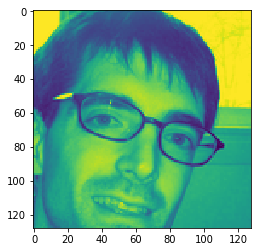

(128, 128)

In [4]:
img = data[16]
plt.imshow(img)
plt.show()
img.shape